In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [4]:
Data = pd.read_csv("AAPL.csv")
print(Data.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-29  100.589996  100.690002   98.040001   99.620003   93.514290   
1  2014-10-06   99.949997  102.379997   98.309998  100.730003   94.556244   
2  2014-10-13  101.330002  101.779999   95.180000   97.669998   91.683792   
3  2014-10-20   98.320000  105.489998   98.220001  105.220001   98.771042   
4  2014-10-27  104.849998  108.040001  104.699997  108.000000  101.380676   

      Volume  
0  142718700  
1  280258200  
2  358539800  
3  358532900  
4  220230600  


In [5]:
print("trainging days =",Data.shape)

trainging days = (184, 7)


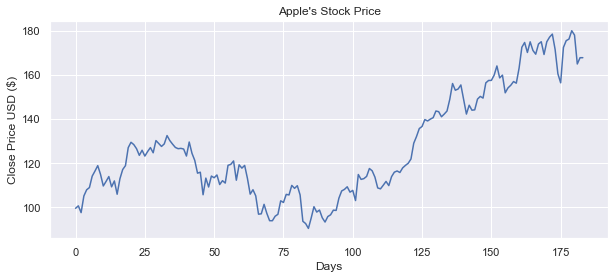

In [6]:
sns.set()
plt.figure(figsize=(10, 4))
plt.title("Apple's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(Data["Close"])
plt.show()

In [7]:
Data = Data[["Close"]]
print(Data.head())

        Close
0   99.620003
1  100.730003
2   97.669998
3  105.220001
4  108.000000


In [8]:
futureDays = 30
Data["Prediction"] = Data[["Close"]].shift(-futureDays)
print(Data.head())
print(Data.tail())

        Close  Prediction
0   99.620003  128.949997
1  100.730003  127.620003
2   97.669998  128.770004
3  105.220001  132.539993
4  108.000000  130.279999
          Close  Prediction
179  179.979996         NaN
180  178.020004         NaN
181  164.940002         NaN
182  167.779999         NaN
183  167.779999         NaN


In [9]:
x = np.array(Data.drop(["Prediction"], 1))[:-futureDays]
print(x)

[[ 99.620003]
 [100.730003]
 [ 97.669998]
 [105.220001]
 [108.      ]
 [109.010002]
 [114.18    ]
 [116.470001]
 [118.93    ]
 [115.      ]
 [109.730003]
 [111.779999]
 [113.989998]
 [109.330002]
 [112.010002]
 [105.989998]
 [112.980003]
 [117.160004]
 [118.93    ]
 [127.080002]
 [129.5     ]
 [128.460007]
 [126.599998]
 [123.589996]
 [125.900002]
 [123.25    ]
 [125.32    ]
 [127.099998]
 [124.75    ]
 [130.279999]
 [128.949997]
 [127.620003]
 [128.770004]
 [132.539993]
 [130.279999]
 [128.649994]
 [127.169998]
 [126.599998]
 [126.75    ]
 [126.440002]
 [123.279999]
 [129.619995]
 [124.5     ]
 [121.300003]
 [115.519997]
 [115.959999]
 [105.760002]
 [113.290001]
 [109.269997]
 [114.209999]
 [113.449997]
 [114.709999]
 [110.379997]
 [112.120003]
 [111.040001]
 [119.080002]
 [119.5     ]
 [121.059998]
 [112.339996]
 [119.300003]
 [117.809998]
 [119.029999]
 [113.18    ]
 [106.029999]
 [108.029999]
 [105.260002]
 [ 96.959999]
 [ 97.129997]
 [101.419998]
 [ 97.339996]
 [ 94.019997]
 [ 93.

In [10]:
y = np.array(Data["Prediction"])[:-futureDays]
print(y)

[128.949997 127.620003 128.770004 132.539993 130.279999 128.649994
 127.169998 126.599998 126.75     126.440002 123.279999 129.619995
 124.5      121.300003 115.519997 115.959999 105.760002 113.290001
 109.269997 114.209999 113.449997 114.709999 110.379997 112.120003
 111.040001 119.080002 119.5      121.059998 112.339996 119.300003
 117.809998 119.029999 113.18     106.029999 108.029999 105.260002
  96.959999  97.129997 101.419998  97.339996  94.019997  93.989998
  96.040001  96.910004 103.010002 102.260002 105.919998 105.669998
 109.989998 108.660004 109.849998 105.68      93.739998  92.720001
  90.519997  95.220001 100.349998  97.919998  98.830002  95.330002
  93.400002  95.889999  96.68      98.779999  98.660004 104.209999
 107.480003 108.18     109.360001 106.940002 107.730003 103.129997
 114.919998 112.709999 113.050003 114.059998 117.629997 116.599998
 113.720001 108.839996 108.43     110.059998 111.790001 109.900002
 113.949997 115.970001 116.519997 115.82     117.910004 119.04

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

In [12]:
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

# creating the Linear Regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(xtrain, ytrain)

In [13]:
xfuture = Data.drop(["Prediction"], 1)[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
print(xfuture)

[[135.720001]
 [136.660004]
 [139.779999]
 [139.139999]
 [139.990005]
 [140.639999]
 [143.660004]
 [143.339996]
 [141.050003]
 [142.270004]
 [143.649994]
 [148.960007]
 [156.100006]
 [153.059998]
 [153.610001]
 [155.449997]
 [148.979996]
 [142.270004]
 [146.279999]
 [144.020004]
 [144.179993]
 [149.039993]
 [150.270004]
 [149.5     ]
 [156.389999]
 [157.479996]
 [157.5     ]
 [159.860001]
 [164.050003]
 [158.630005]]


In [14]:
treePrediction = tree.predict(xfuture)
print("Decision Tree prediction =",treePrediction)

Decision Tree prediction = [151.889999 151.889999 154.119995 155.300003 156.990005 156.990005
 163.050003 172.5      156.990005 173.619995 174.970001 156.410004
 169.369995 175.009995 175.009995 169.229996 156.410004 173.619995
 178.460007 160.5      160.5      156.410004 172.429993 175.5
 176.210007 179.979996 178.020004 164.940002 164.940002 178.020004]


In [15]:
linearPrediction = linear.predict(xfuture)
print("Linear regression Prediction =",linearPrediction)

Linear regression Prediction = [143.12936169 143.92941498 146.58489826 146.04018287 146.76363811
 147.31685957 149.88723959 149.61487508 147.66582128 148.70418584
 149.8787199  154.39816649 160.47514674 157.88774182 158.35585916
 159.92191251 154.41517948 148.70418584 152.11716397 150.193642
 150.32981148 154.466244   155.51312826 154.85776415 160.72196495
 161.6496808  161.66670656 163.67534542 167.24153071 162.62847393]


C:\Users\arabtech\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


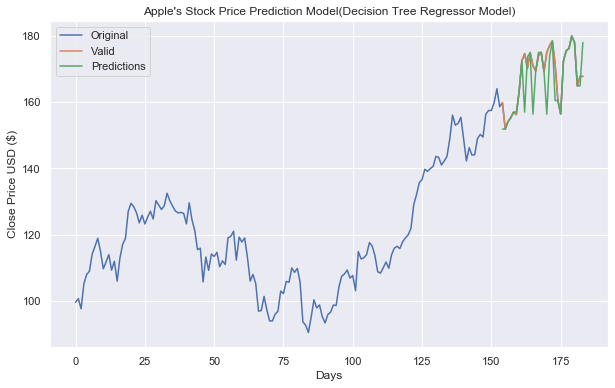

In [16]:
predictions = treePrediction
valid = Data[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(Data["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

C:\Users\arabtech\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


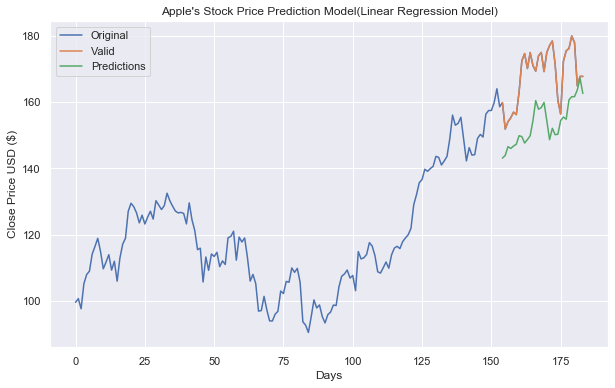

In [17]:
predictions = linearPrediction
valid = Data[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(Data["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()